# Hypothesis 

Applicants have high chances of approval, in case

<ol>1. Applicants with high income</ol>
<ol>2. Applicants who have repaid theor previous debts</ol>
<ol>3. loan amount is less</ol>
<ol>4. Less amount to pay monthly</ol>

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading the loan prediction data
data = pd.read_csv('train_data.csv')

In [3]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Categorical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

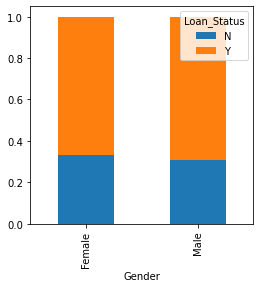

In [4]:
Gender = pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Observation : Proportion of male and female applicants is same for approved and not approved loans

<AxesSubplot:xlabel='Self_Employed'>

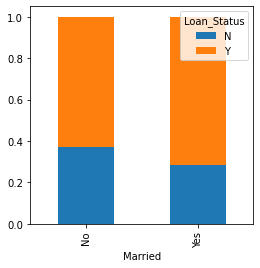

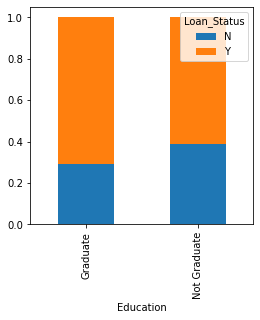

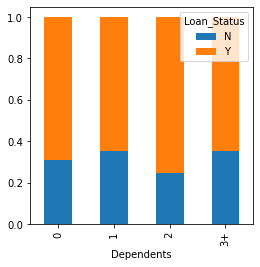

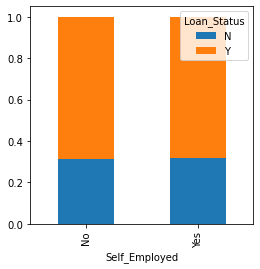

In [5]:
#other categorical variable

Married = pd.crosstab(data['Married'],data['Loan_Status'])
Dependents = pd.crosstab(data['Dependents'],data['Loan_Status'])
Education = pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed = pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Observation :

1. Proportion of married is higher for approved loans
2. Distribution of 1 or 3+ dependent is similar for both the categories of loan status
3. We cant infer anything from Self_Employed plot

<AxesSubplot:xlabel='Property_Area'>

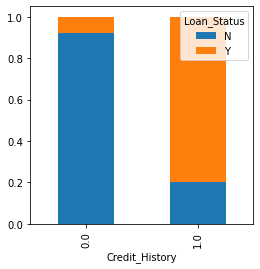

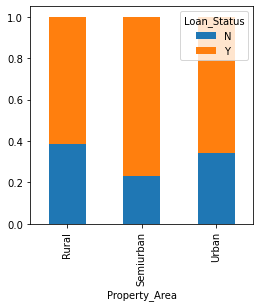

In [6]:
#other category independent variables

Credit_History = pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area = pd.crosstab(data['Property_Area'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Observation :
    
1. It can be inferred that applicants with credit hostory as 1 has more approvals
2. SemiUrban Property area seems to have more approval

## Numerical Independent Variable vs Target variable

<AxesSubplot:xlabel='Loan_Status'>

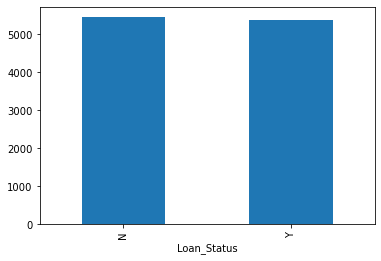

In [7]:
#lets try mean income of applicants for approval

data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Observation : mean income appears same for loan status. If we can divide into beans and observe

Text(0, 0.5, 'Percentage')

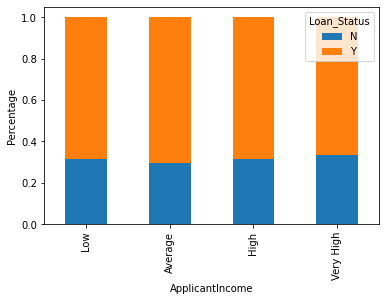

In [8]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
data['Income_bin'] = pd.cut(data['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Observation : Applicants income doesnt play any role in loan approval. It contradicts our hypothesis that more the income, more chances of loan approval

Text(0, 0.5, 'Percentage')

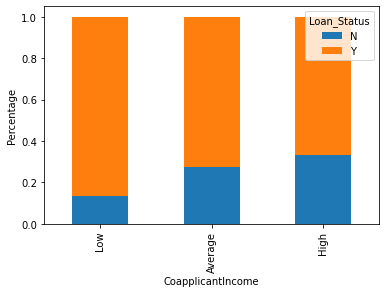

In [9]:
# lets analyse coapplicant income in same manner

bins = [0,1000,3000,42000]
group = ['Low','Average','High']
data['Coapplicant_Income_bin'] = pd.cut(data['CoapplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Observation : It looks like less is the coapplicant income, more chances of approval, which doesnt seems right. It may happen that applicant with high income and 0 coapplicant income may get approval.
Its best to add both applcant and coapplicant income and then compare
    

Text(0, 0.5, 'Percentage')

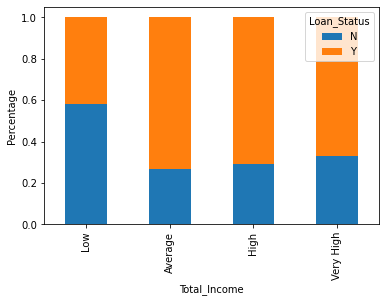

In [10]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
data['Total_Income_bin'] = pd.cut(data['Total_Income'],bins,labels=group)

Income_bin = pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Observation : Proportion of Loan approval for low income bracket is very less as compared to Average,High or Very High Income bracket

### Loan Amount

Text(0, 0.5, 'Percentage')

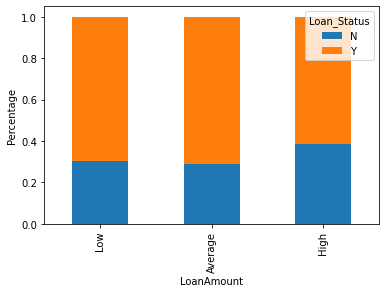

In [11]:
bins = [0,100,200,700]
group = ['Low','Average','High']
data['LoanAmount_bin'] = pd.cut(data['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(data['LoanAmount_bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

Observation : Proportion of loan approved is higher for low and average loan amount as compared to high loan amounts

It support our hypothesis of lesser the loan amount, higher the chances of approval

In [12]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High,Low,8312.0,Very High,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very High,NaN,7583.0,Very High,Average


In [13]:
#lets drop the bins we created for exploration part

#data = data.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'],axis=1)

#lets replace categorical to numerical

data['Dependents'].replace('3+',3,inplace=True)
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

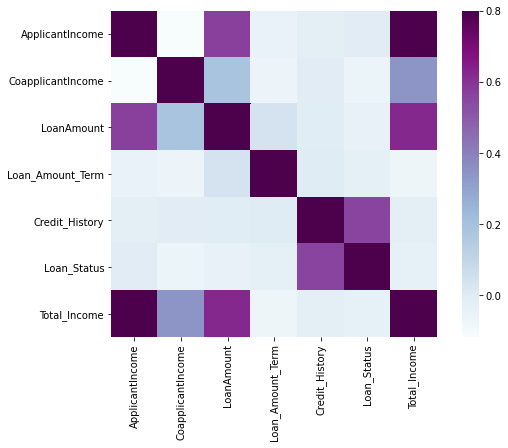

In [14]:
matrix = data.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')

Observation :
    
1. Applicant income has strong correlation with LoanAmount
2. Similary, Credit_History plays an important role for loan status approval